In [1]:
import scanpy as scp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
import pandas as pd
import umap

import sys
sys.path.append('../')
from mySCfunctions import *
from silent import *
sys.path.append('./')

import Parameters as par
from importlib import reload
reload(par);

from sklearn import preprocessing
import pydpc

import os, shutil

import warnings
warnings.filterwarnings('ignore')

In [2]:
s_genes_list = \
    ['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm2', 'Mcm4', 'Rrm1', 'Ung', 'Gins2',
     'Mcm6', 'Cdca7', 'Dtl', 'Prim1', 'Uhrf1', 'Mlf1ip', 'Hells', 'Rfc2',
     'Rpa2', 'Nasp', 'Rad51ap1', 'Gmnn', 'Wdr76', 'Slbp', 'Ccne2', 'Ubr7',
     'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2', 'Cdc45', 'Cdc6', 'Exo1', 'Tipin',
     'Dscc1', 'Blm', 'Casp8ap2', 'Usp1', 'Clspn', 'Pola1', 'Chaf1b', 'Brip1', 'E2f8']
g2m_genes_list = \
    ['Hmgb2', 'Cdk1', 'Nusap1', 'Ube2c', 'Birc5', 'Tpx2', 'Top2a', 'Ndc80',
     'Cks2', 'Nuf2', 'Cks1b', 'Mki67', 'Tmpo', 'Cenpf', 'Tacc3', 'Fam64a',
     'Smc4', 'Ccnb2', 'Ckap2l', 'Ckap2', 'Aurkb', 'Bub1', 'Kif11', 'Anp32e',
     'Tubb4b', 'Gtse1', 'Kif20b', 'Hjurp', 'Cdca3', 'Hn1', 'Cdc20', 'Ttk',
     'Cdc25c', 'Kif2c', 'Rangap1', 'Ncapd2', 'Dlgap5', 'Cdca2', 'Cdca8',
     'Ect2', 'Kif23', 'Hmmr', 'Aurka', 'Psrc1', 'Anln', 'Lbr', 'Ckap5',
     'Cenpe', 'Ctcf', 'Nek2', 'G2e3', 'Gas2l3', 'Cbx5', 'Cenpa']

In [3]:
a = scp.read("ManipulatedData/"+par.METRIC+"/Doublets_removed.h5ad")

# Plots without correction

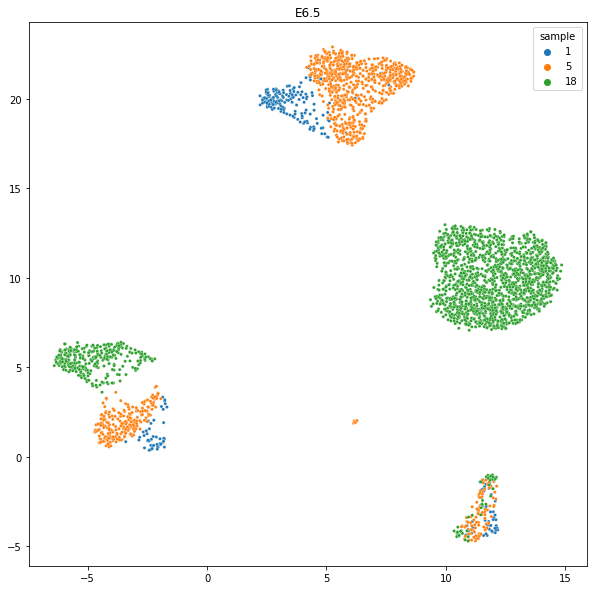

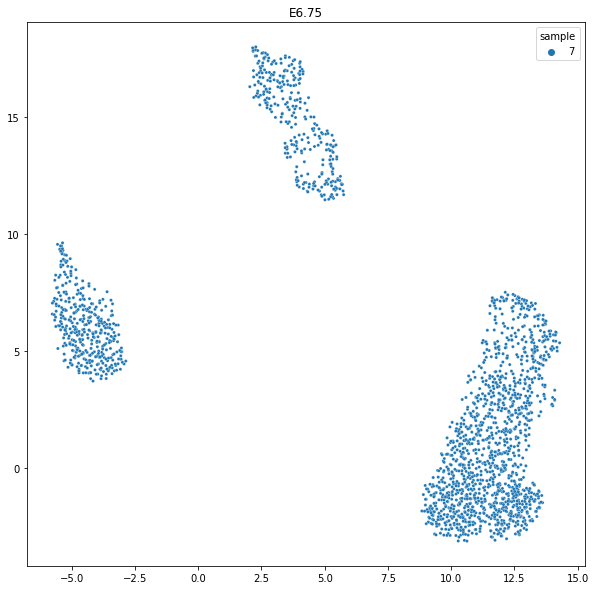

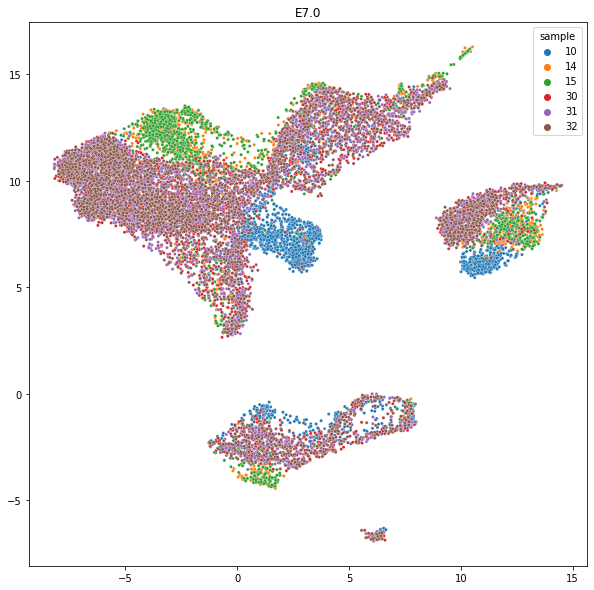

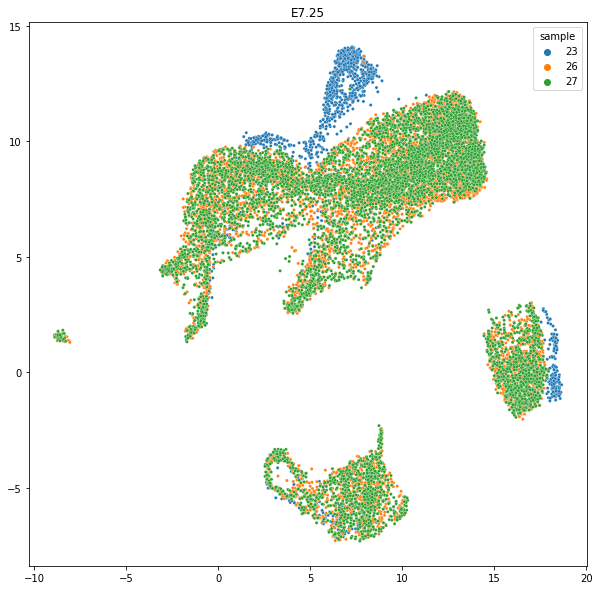

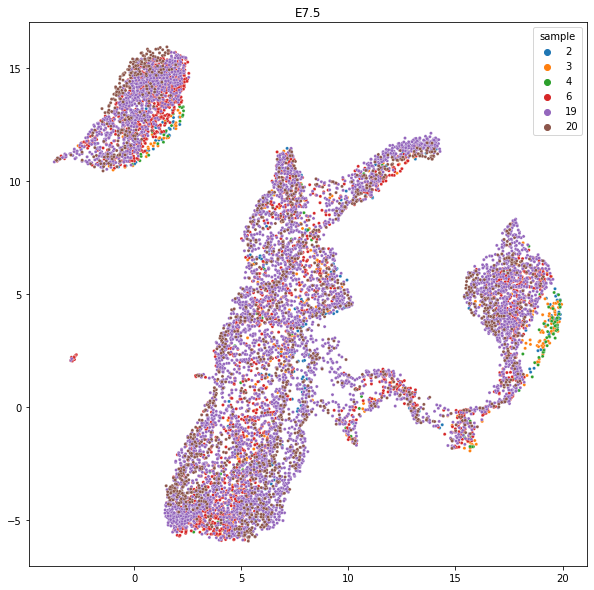

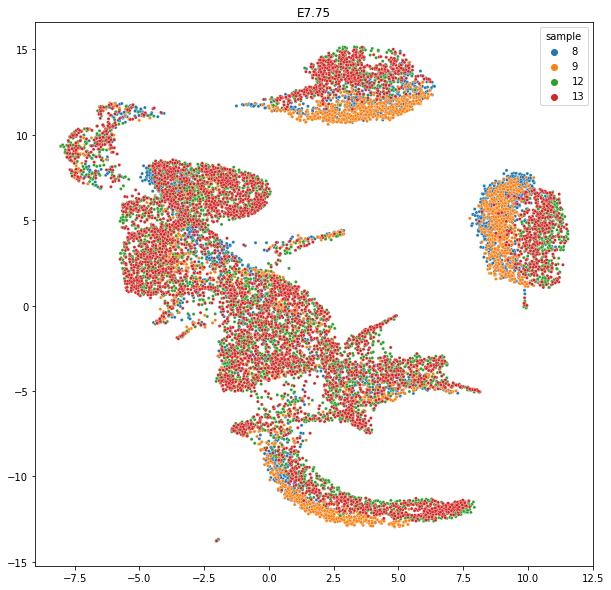

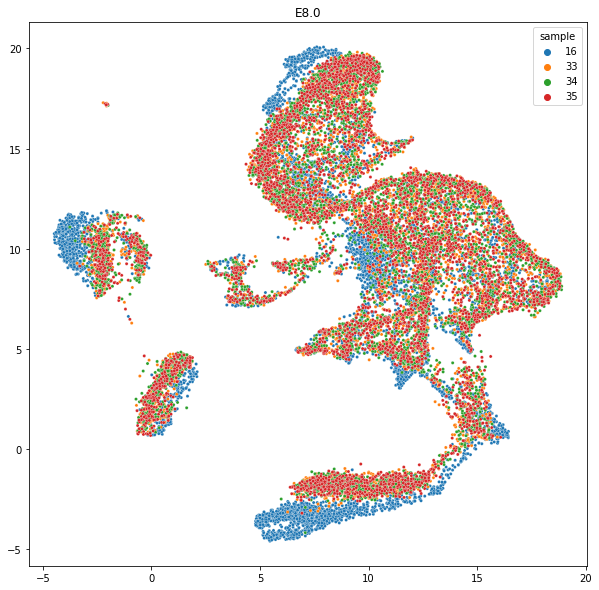

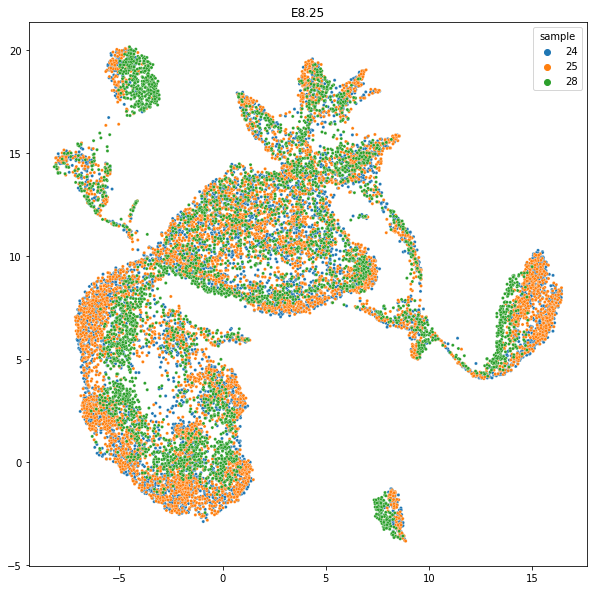

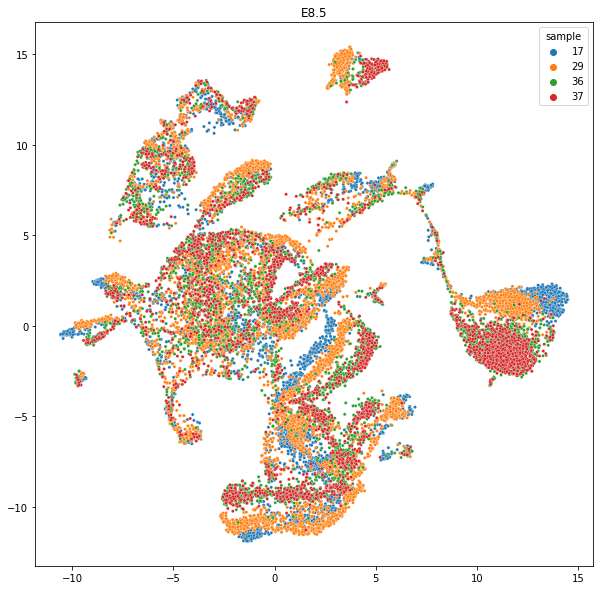

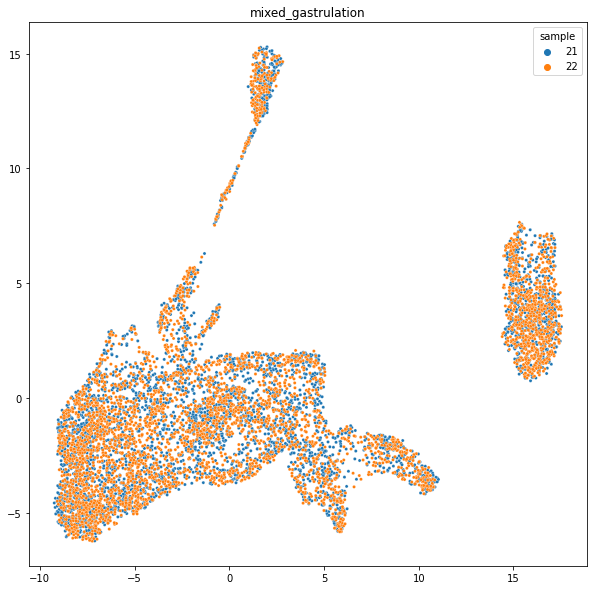

In [11]:
for j,stage in enumerate(np.sort(a.obs["stage"].unique())):

    b = a[a.obs["stage"]==stage,:].copy()
    b.obs["stage"]=b.obs["stage"].astype(str)
    b.obs["sample"]=b.obs["sample"].astype(str)
    scp.pp.log1p(b)
    scp.pp.highly_variable_genes(b,flavor=par.HVG_METHOD)
    for i in s_genes_list:
        b.var.loc[b.var["Gene"]==i,"highly_variable"] = False
    for i in g2m_genes_list:
        b.var.loc[b.var["Gene"]==i,"highly_variable"] = False
    
    scp.pp.pca(b,n_comps=par.N_PCS,use_highly_variable=par.USE_HVGs)
    scp.pp.neighbors(b,knn=par.N_NEIGBOURS,n_pcs=par.N_PCS)
    
    scp.tl.umap(b)
    
    fig,ax = plt.subplots(1,1,figsize=[10,10])
    sb.scatterplot(b.obsm["X_umap"][:,0],b.obsm["X_umap"][:,1],hue=b.obs["sample"],s=10,ax=ax)
    ax.set_title(stage)
    fig.savefig("./Plots/BatchCorrection/Stages_without_correction_umap_"+stage+".png",bbox_inches="tight",transparent=True)

    #scp.tl.tsne(b)
    
    #fig,ax = plt.subplots(1,1,figsize=[10,10])
    #sb.scatterplot(b.obsm["X_tsne"][:,0],b.obsm["X_tsne"][:,1],hue=b.obs["sample"],s=10,ax=ax2)
    #ax.set_title(stage)
    #fig.savefig("./Plots/BatchCorrection/Stages_without_correction_tsne_"+stage+".png",bbox_inches="tight",transparent=True)

# Plots with harmony correction

2021-07-07 17:42:50,614 - harmonypy - INFO - Iteration 1 of 10
2021-07-07 17:42:51,033 - harmonypy - INFO - Iteration 2 of 10
2021-07-07 17:42:51,371 - harmonypy - INFO - Iteration 3 of 10
2021-07-07 17:42:51,773 - harmonypy - INFO - Iteration 4 of 10
2021-07-07 17:42:52,107 - harmonypy - INFO - Iteration 5 of 10
2021-07-07 17:42:52,437 - harmonypy - INFO - Iteration 6 of 10
2021-07-07 17:42:52,567 - harmonypy - INFO - Iteration 7 of 10
2021-07-07 17:42:52,682 - harmonypy - INFO - Iteration 8 of 10
2021-07-07 17:42:52,811 - harmonypy - INFO - Iteration 9 of 10
2021-07-07 17:42:52,926 - harmonypy - INFO - Iteration 10 of 10
2021-07-07 17:42:53,046 - harmonypy - INFO - Converged after 10 iterations
... storing 'sample' as categorical
... storing 'stage' as categorical
2021-07-07 17:42:57,812 - harmonypy - INFO - Iteration 1 of 10
2021-07-07 17:42:57,971 - harmonypy - INFO - Iteration 2 of 10
2021-07-07 17:42:58,133 - harmonypy - INFO - Iteration 3 of 10
2021-07-07 17:42:58,191 - harmonyp

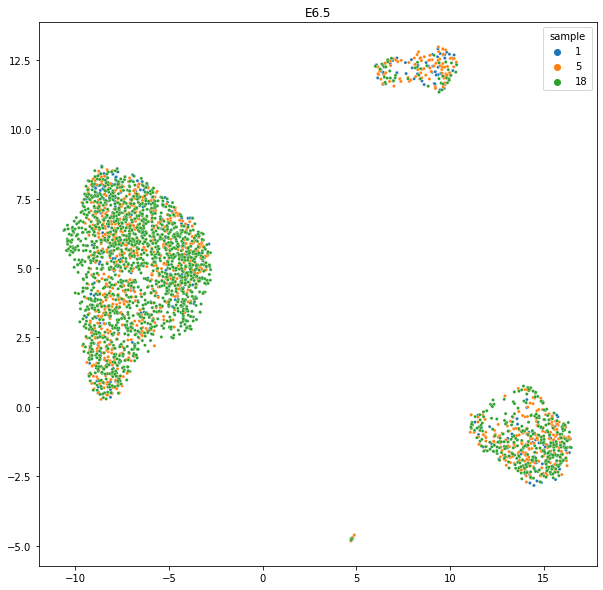

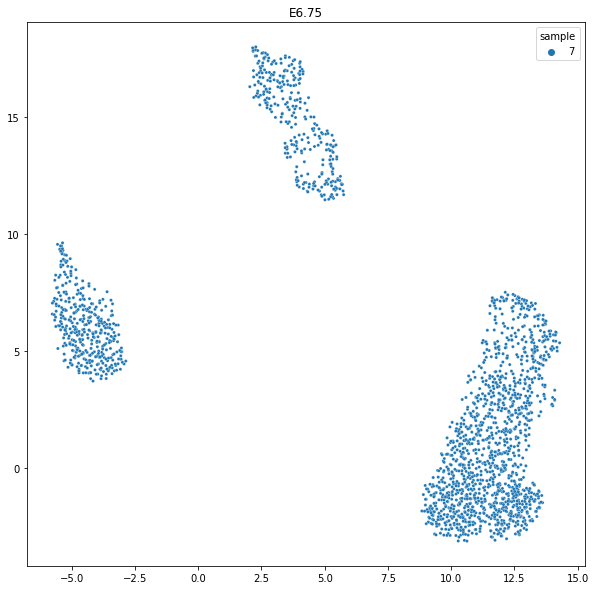

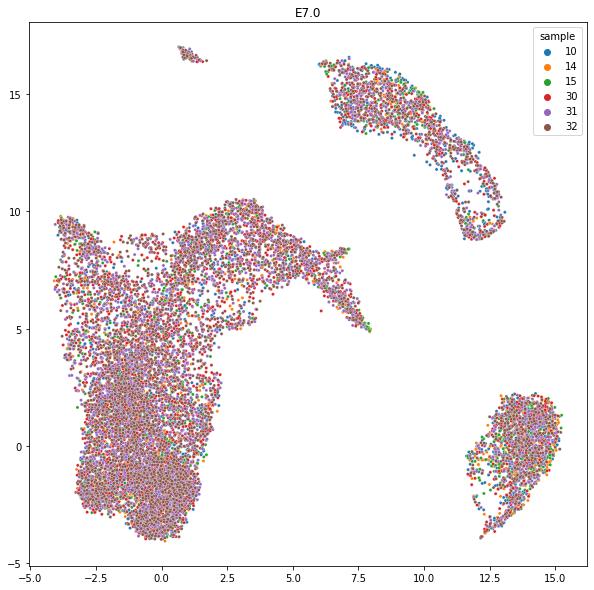

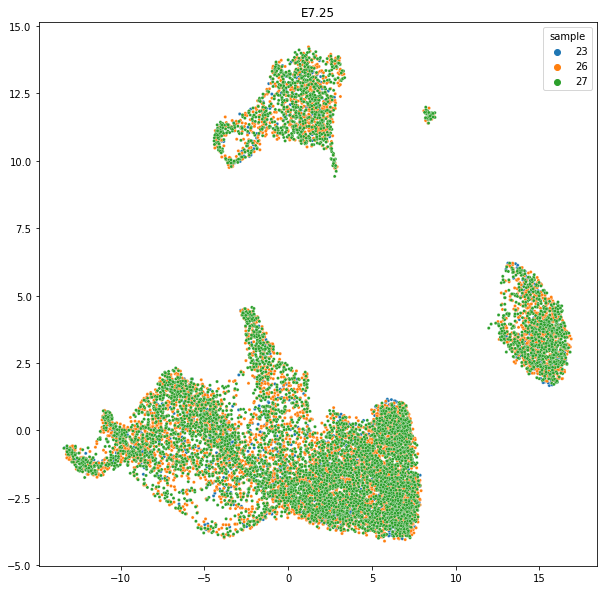

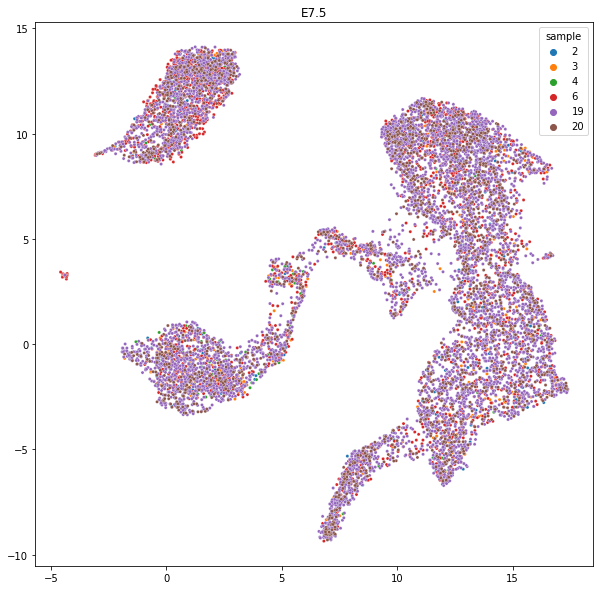

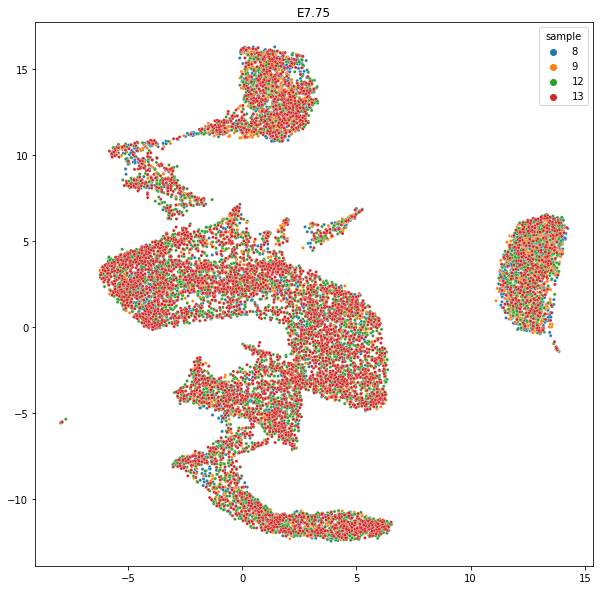

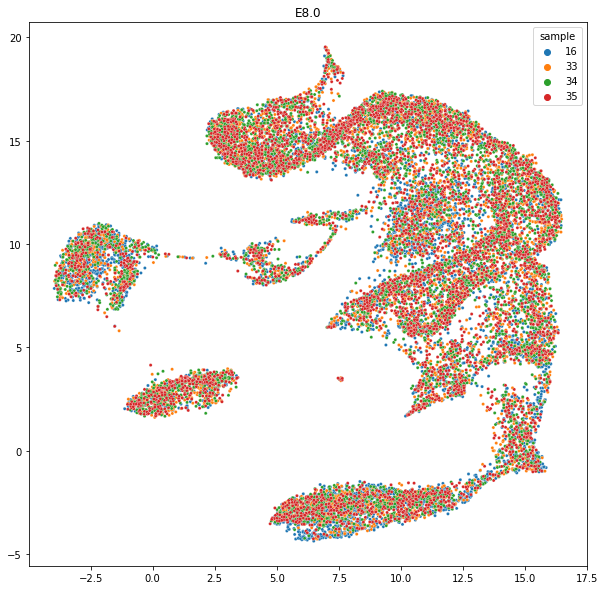

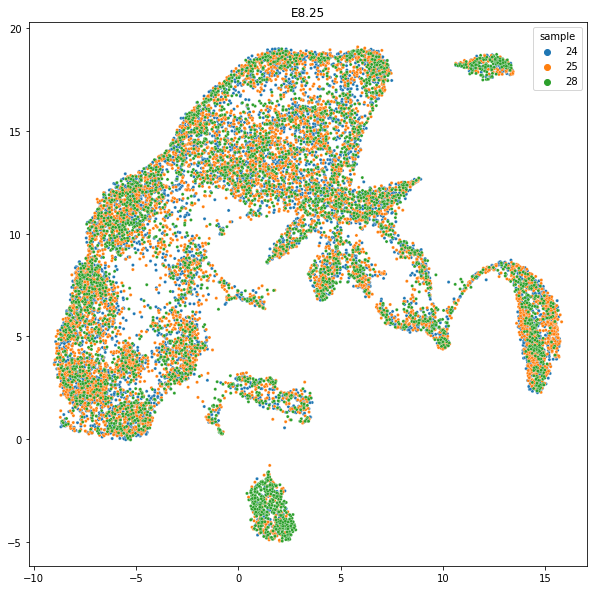

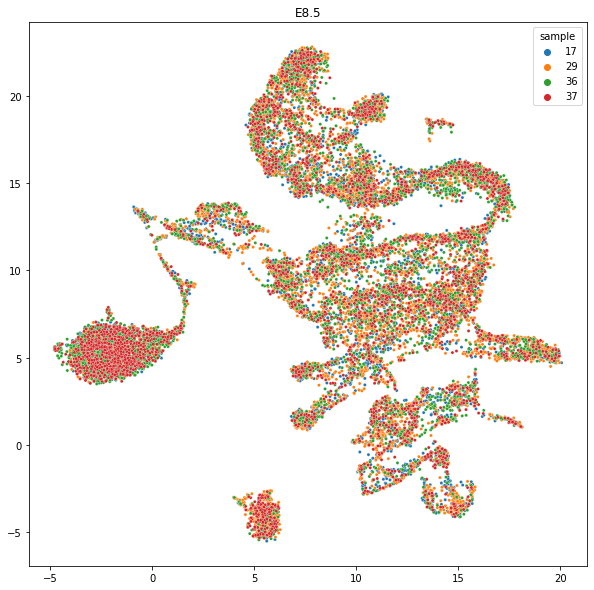

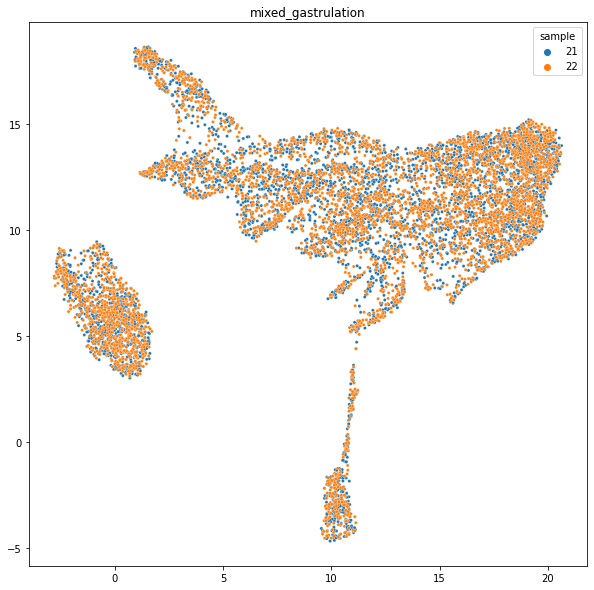

In [9]:
for j,stage in enumerate(np.sort(a.obs["stage"].unique())):

    b = a[a.obs["stage"]==stage,:].copy()
    b.obs["stage"]=b.obs["stage"].astype(str)
    b.obs["sample"]=b.obs["sample"].astype(str)
    scp.pp.log1p(b)
    scp.pp.highly_variable_genes(b,flavor=par.HVG_METHOD)
    for i in s_genes_list:
        b.var.loc[b.var["Gene"]==i,"highly_variable"] = False
    for i in g2m_genes_list:
        b.var.loc[b.var["Gene"]==i,"highly_variable"] = False

    scp.pp.pca(b,n_comps=par.N_PCS,use_highly_variable=par.USE_HVGs)
    scp.external.pp.harmony_integrate(b,"sample")
    scp.pp.neighbors(b,knn=par.N_NEIGBOURS,n_pcs=par.N_PCS,use_rep="X_pca_harmony")
    
    scp.tl.umap(b)
    
    b.write("ManipulatedData/"+par.METRIC+"/Batch_"+stage+".h5ad")
    
    fig,ax = plt.subplots(1,1,figsize=[10,10])
    sb.scatterplot(b.obsm["X_umap"][:,0],b.obsm["X_umap"][:,1],hue=b.obs["sample"],s=10,ax=ax)
    ax.set_title(stage)
    fig.savefig("./Plots/BatchCorrection/Stages_with_harmony_correction_umap_"+stage+".png",bbox_inches="tight",transparent=True)

    #scp.tl.tsne(b,use_rep="X_pca_harmony")
    
    #fig,ax = plt.subplots(1,1,figsize=[10,10])
    #sb.scatterplot(b.obsm["X_tsne"][:,0],b.obsm["X_tsne"][:,1],hue=b.obs["sample"],s=10,ax=ax2)
    #ax2.set_title(stage)
    #fig.savefig("./Plots/BatchCorrection/Stages_without_correction_tsne_"+stage+".png",bbox_inches="tight",transparent=True)

# Plots with fast MNN correction

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 2: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 2: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.
Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 5: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 5: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 3 of 5: processing batch 3
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 4 of 5: processing batch 4
  Looking for MNNs...
  Computing 

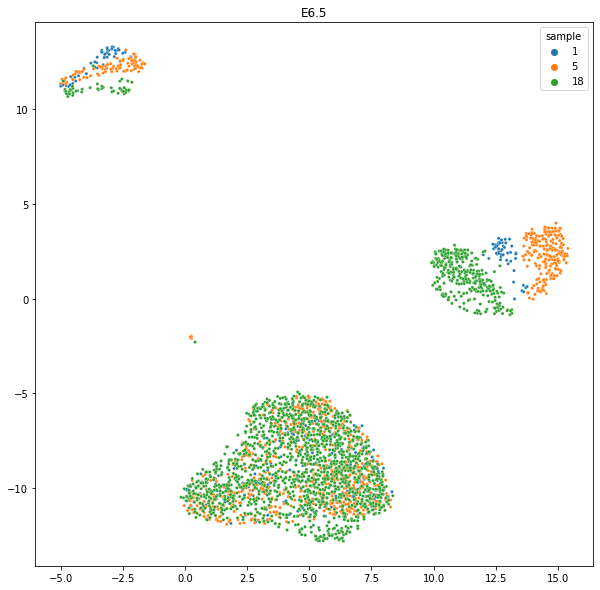

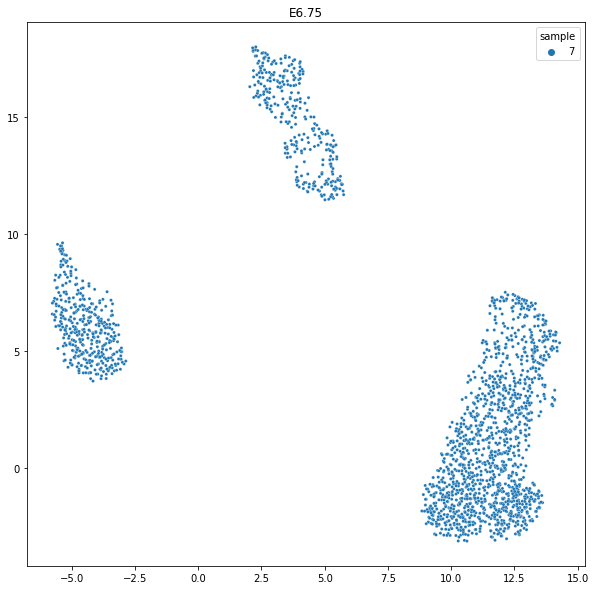

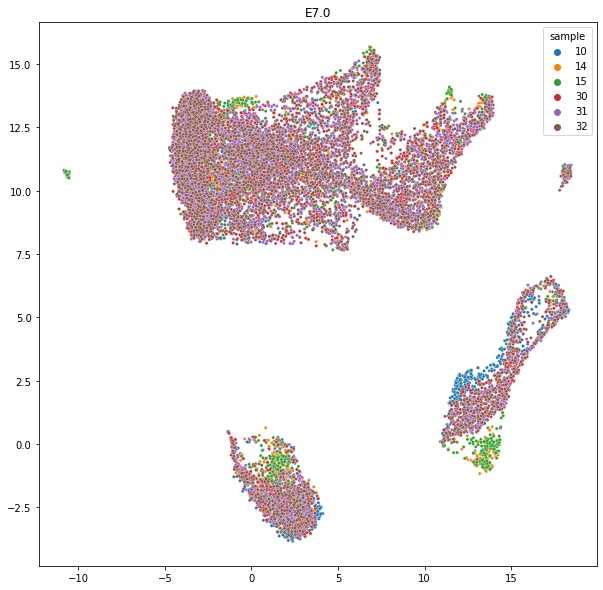

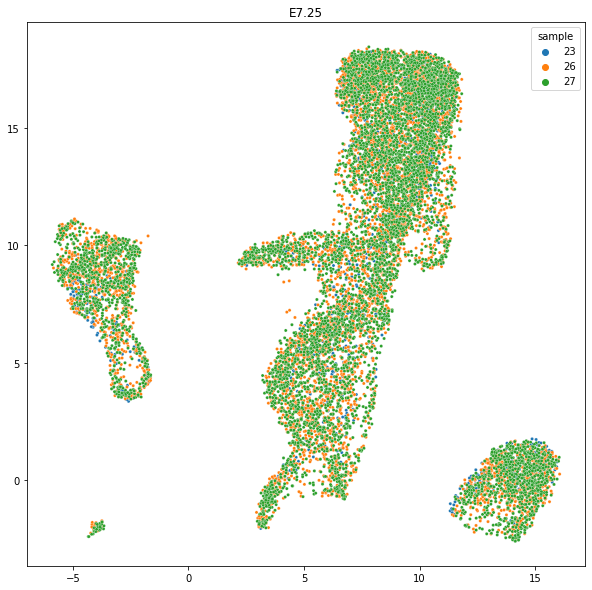

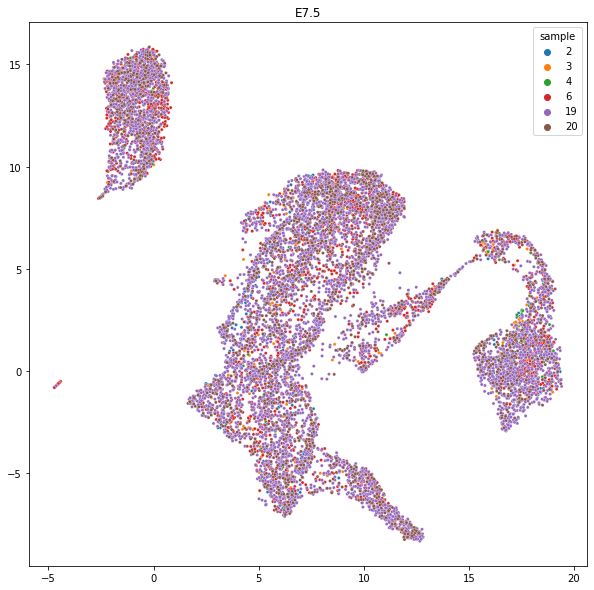

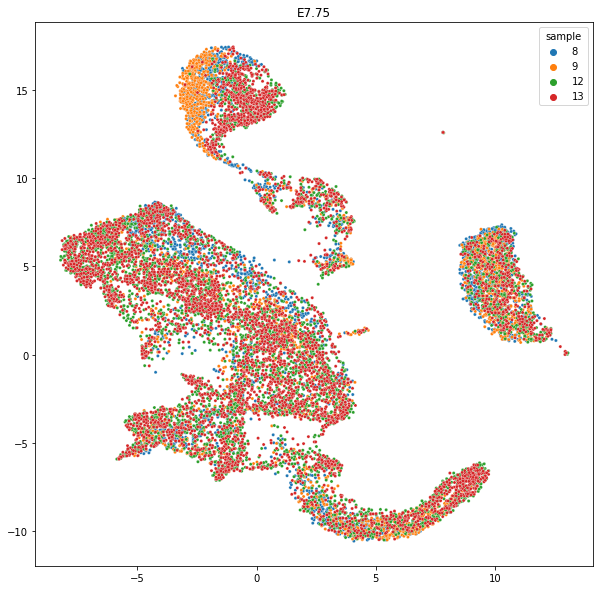

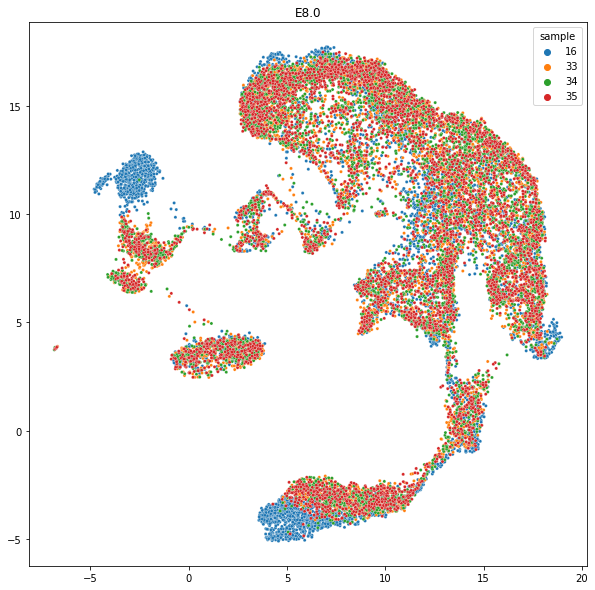

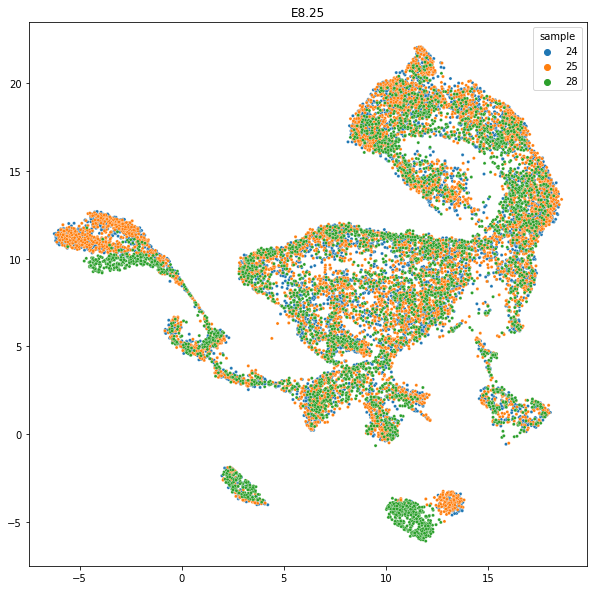

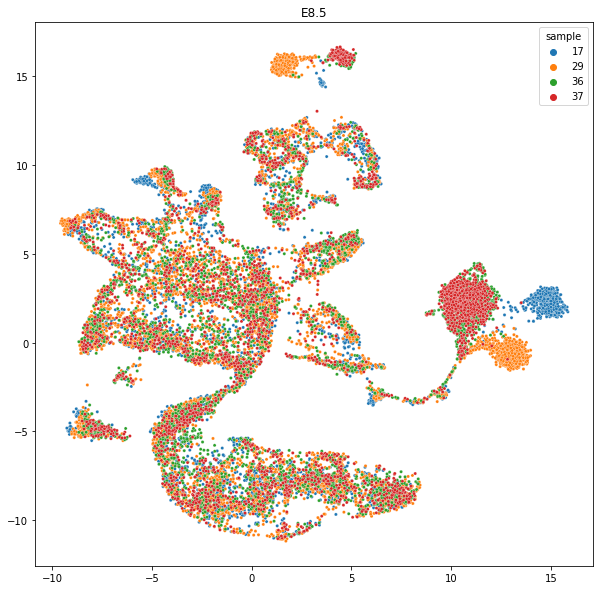

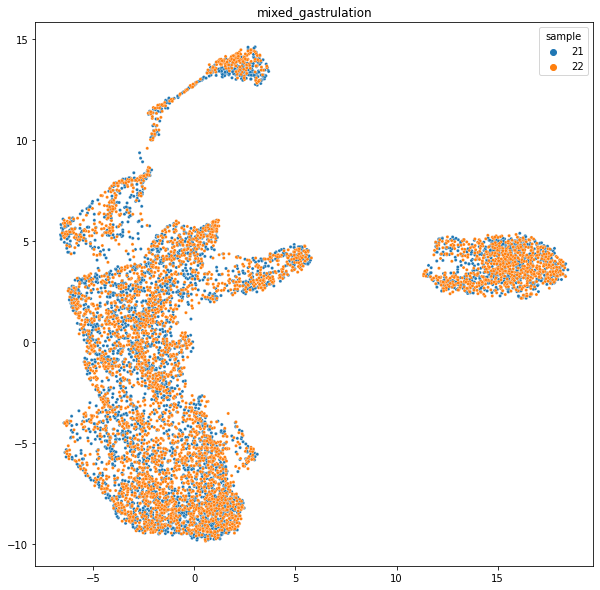

In [15]:
for j,stage in enumerate(np.sort(a.obs["stage"].unique())):

    b = a[a.obs["stage"]==stage,:].copy()
    b.obs["stage"]=b.obs["stage"].astype(str)
    b.obs["sample"]=b.obs["sample"].astype(str)
    scp.pp.log1p(b)
    scp.pp.highly_variable_genes(b,flavor=par.HVG_METHOD)
    for i in s_genes_list:
        b.var.loc[b.var["Gene"]==i,"highly_variable"] = False
    for i in g2m_genes_list:
        b.var.loc[b.var["Gene"]==i,"highly_variable"] = False

    scp.pp.pca(b,n_comps=par.N_PCS,use_highly_variable=par.USE_HVGs)
    mnn_correct(b,"sample")
    scp.pp.neighbors(b,knn=par.N_NEIGBOURS,n_pcs=par.N_PCS,use_rep="X_MNN")
    
    scp.tl.umap(b)
    
    fig,ax = plt.subplots(1,1,figsize=[10,10])
    sb.scatterplot(b.obsm["X_umap"][:,0],b.obsm["X_umap"][:,1],hue=b.obs["sample"],s=10,ax=ax)
    ax.set_title(stage)
    fig.savefig("./Plots/BatchCorrection/Stages_with_mnn_correction_umap_"+stage+".png",bbox_inches="tight",transparent=True)